This file plots out the results from Snakefile Run 1
(samples 2, 4, 8; methods: linreg, boosting, elastic, forest;
features: single, forest, string)

Note the boosting had very small steps 0.01 and many n_estimators and so are slow.
We did not run the "all" features. Also the results were coded in a list
rather than a dictionary (model, metrics) so may be slower to load.

In [ ]:
import pickle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def get_dataframe(path):
    with open(path, 'rb') as f:
        results = pickle.load(f)
        df_ = pd.concat([result[1] for result in results])
    return df_

def get_median_corr(path):
    return np.median(get_dataframe(path)['corr_test'])


def plot_corr(path):

    res = get_dataframe(path)

    res['id'] = res.index
    df_ = pd.wide_to_long(res, ['corr'], i='id', j='set', sep='_', suffix=r'\w+')

    df_g = df_.groupby('set')['corr'].agg(['mean', 'median'])

    g = sns.displot(
        data=df_, x='corr',
        col='set',
        facet_kws=dict(sharey=False, sharex=False)
    )

    # extract and flatten the axes from the figure
    axes = g.axes.flatten()

    # iterate through each axes
    for ax in axes:
        # extract the species name
        spec = ax.get_title().split(' = ')[1]

        # select the data for the species
        data = df_g.loc[spec, :]

        ax.text(x=data['median'], y=2, s='median: ' + str(np.round(data['median'], 3)))
        # plot the lines
        ax.axvline(x=data['median'], c='orange', ls='--', lw=2.5)

    g.savefig(os.path.splitext(path)[0] + '.pdf')

    return g


In [3]:
print(get_median_corr('../out/tumor4_forest_single.p'))
print(get_median_corr('../out/tumor4_forest_corum.p'))
print(get_median_corr('../out/tumor4_forest_string.p'))

0.3158155784834969
0.34937517242541427
0.47182875258289236


In [4]:
print(get_median_corr('../out/tumor2_forest_single.p'))
print(get_median_corr('../out/tumor2_forest_corum.p'))
print(get_median_corr('../out/tumor2_forest_string.p'))

0.297761315921962
0.3376170814163504
0.47745567157648583


In [43]:
print(get_median_corr('../out/tumor2_boosting_single.p'))
print(get_median_corr('../out/tumor2_boosting_corum.p'))
print(get_median_corr('../out/tumor2_boosting_string.p'))

0.2623341966177863
0.30161590779709824
0.4458866109462728


In [5]:
print(get_median_corr('../out/tumor8_forest_single.p'))
print(get_median_corr('../out/tumor8_forest_corum.p'))
print(get_median_corr('../out/tumor8_forest_string.p'))

0.4405670436907536
0.4878001412114127
0.674756371310288


In [6]:
print(get_median_corr('../out/tumor4_linreg_single.p'))
print(get_median_corr('../out/tumor4_linreg_corum.p'))
print(get_median_corr('../out/tumor4_linreg_string.p'))

0.3411152406571135
0.35433702021941005
0.0892711105047808


In [40]:
print(get_median_corr('../out/tumor4_elastic_single.p'))
print(get_median_corr('../out/tumor4_elastic_corum.p'))
print(get_median_corr('../out/tumor4_elastic_string.p'))

0.3373641645911907
0.35694999025235113
0.4289959794652282


In [41]:
print(get_median_corr('../out/tumor4_boosting_single.p'))
print(get_median_corr('../out/tumor4_boosting_corum.p'))
print(get_median_corr('../out/tumor8_boosting_single.p'))
print(get_median_corr('../out/tumor8_boosting_corum.p'))

0.2815237097613627
0.31714663763319767
0.45313339701362443
0.5067354913826285


Get data frames of 8 tumor forest vs. linreg. See which proteins have non-linear relationship with their transcripts
Then find a way to plot out models.

In [9]:
tumor8_forest_single = get_dataframe('../out/tumor8_forest_single.p')
tumor8_linreg_single = get_dataframe('../out/tumor8_linreg_single.p')

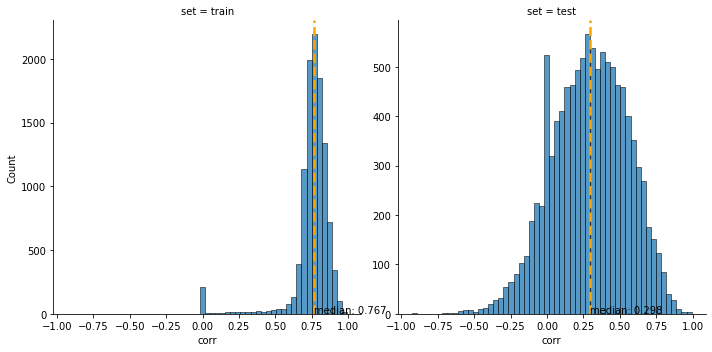

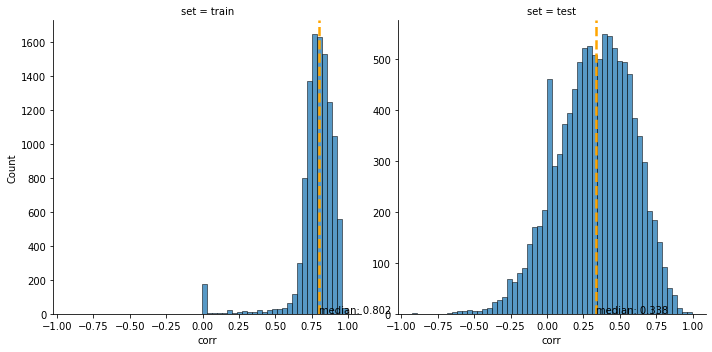

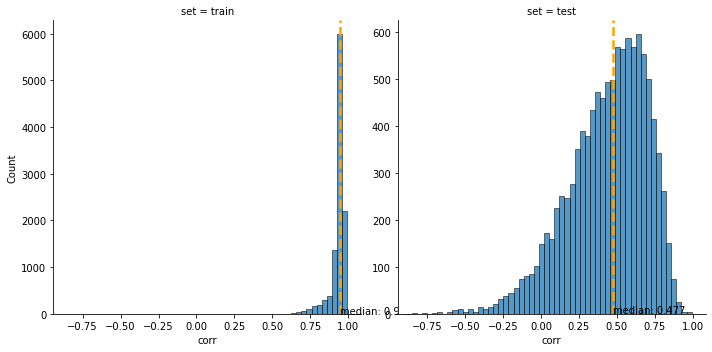

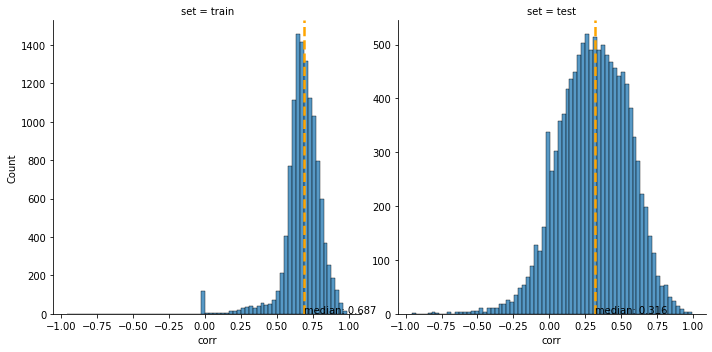

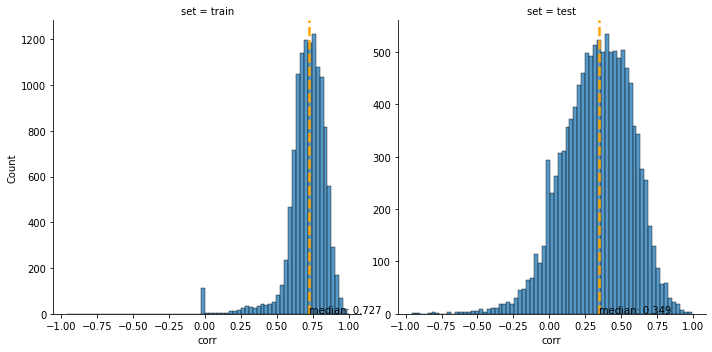

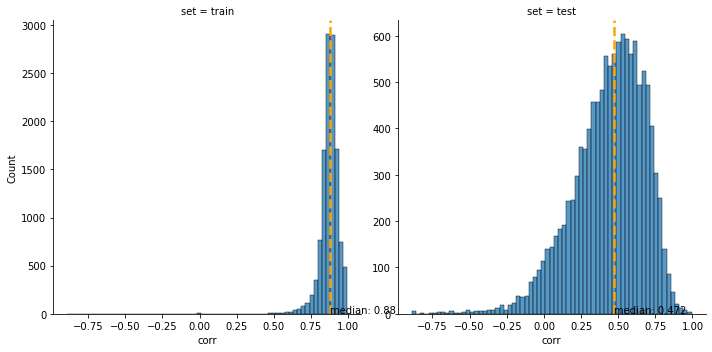

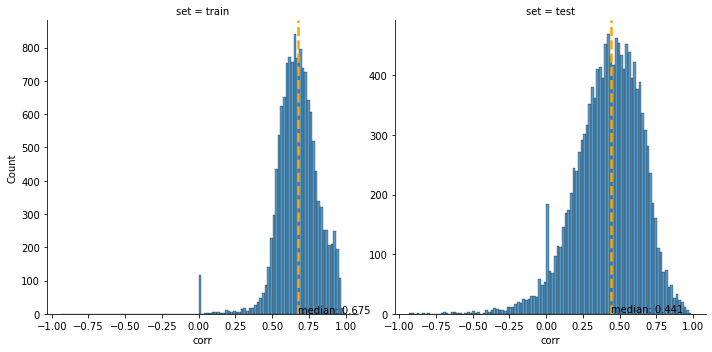

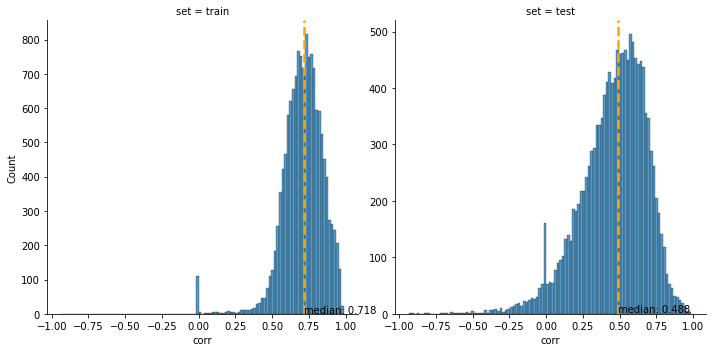

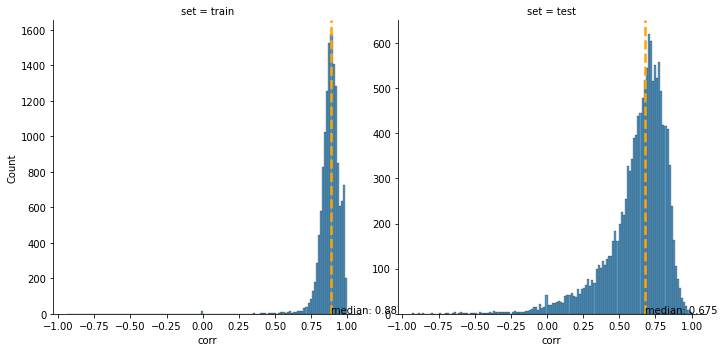

In [76]:
plot_corr('../out/tumor2_forest_single.p')
plot_corr('../out/tumor2_forest_corum.p')
plot_corr('../out/tumor2_forest_string.p')

plot_corr('../out/tumor4_forest_single.p')
plot_corr('../out/tumor4_forest_corum.p')
plot_corr('../out/tumor4_forest_string.p')

plot_corr('../out/tumor8_forest_single.p')
plot_corr('../out/tumor8_forest_corum.p')
plot_corr('../out/tumor8_forest_string.p')

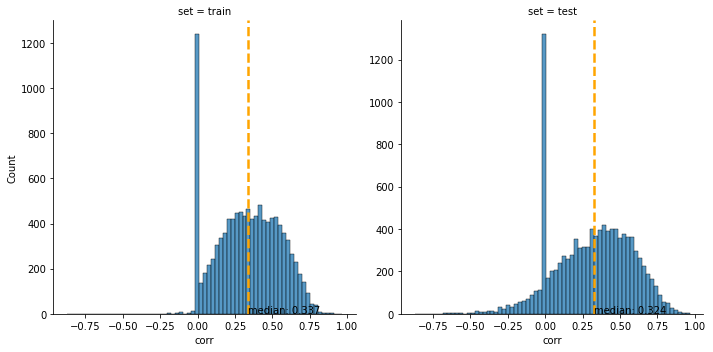

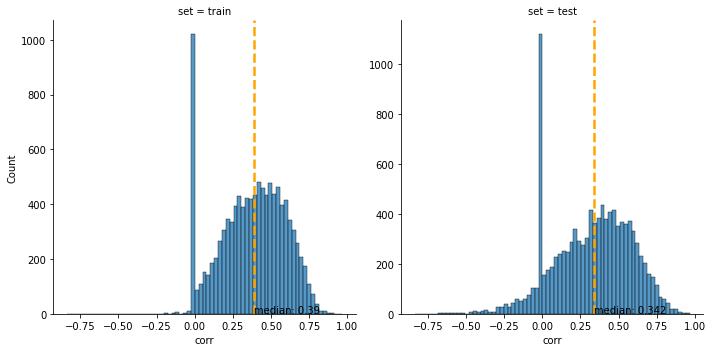

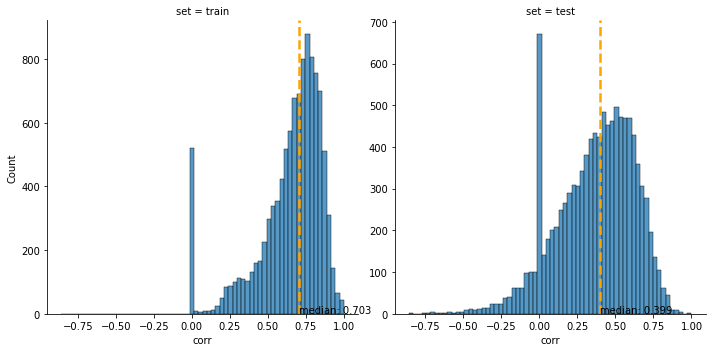

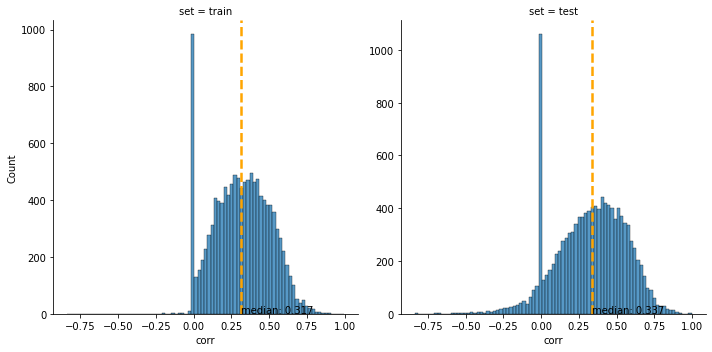

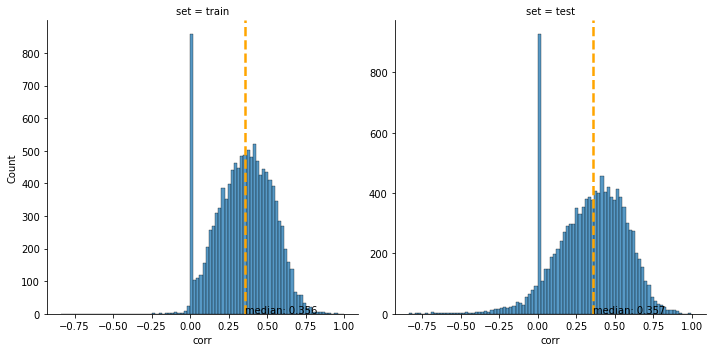

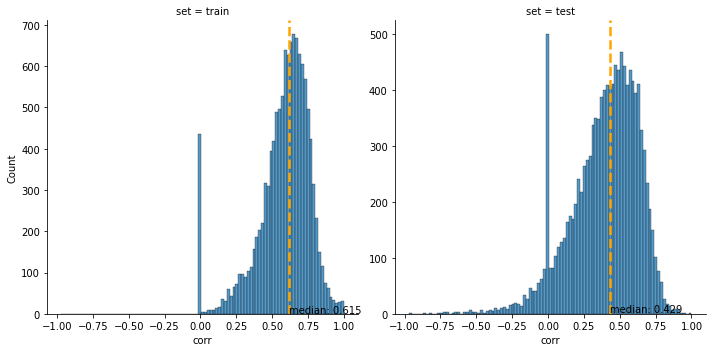

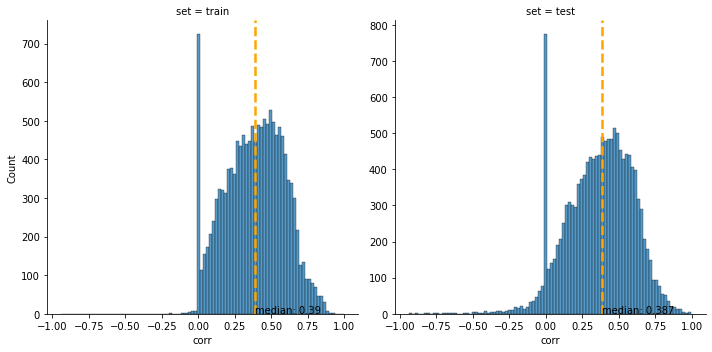

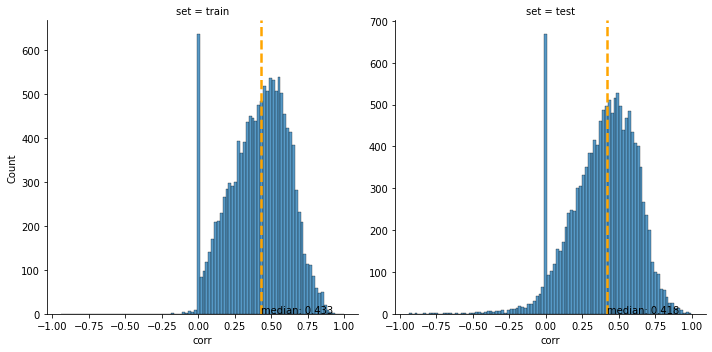

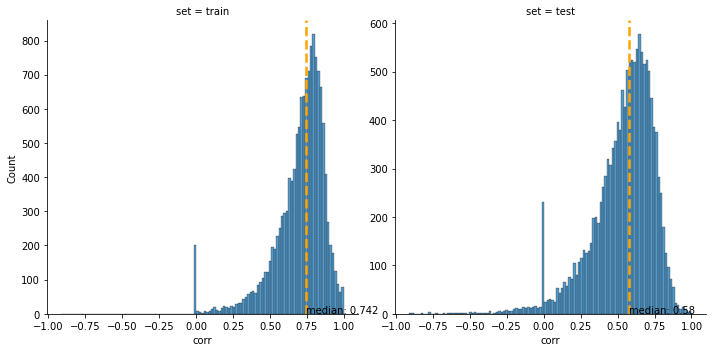

In [77]:
plot_corr('../out/tumor2_elastic_single.p')
plot_corr('../out/tumor2_elastic_corum.p')
plot_corr('../out/tumor2_elastic_string.p')

plot_corr('../out/tumor4_elastic_single.p')
plot_corr('../out/tumor4_elastic_corum.p')
plot_corr('../out/tumor4_elastic_string.p')

plot_corr('../out/tumor8_elastic_single.p')
plot_corr('../out/tumor8_elastic_corum.p')
plot_corr('../out/tumor8_elastic_string.p')

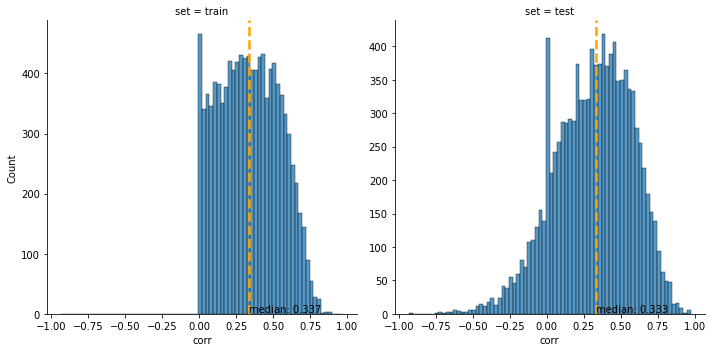

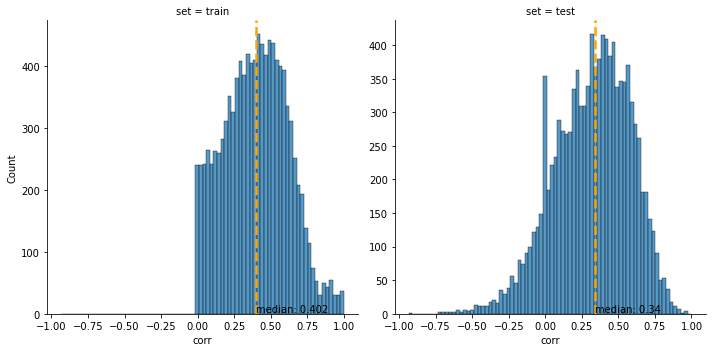

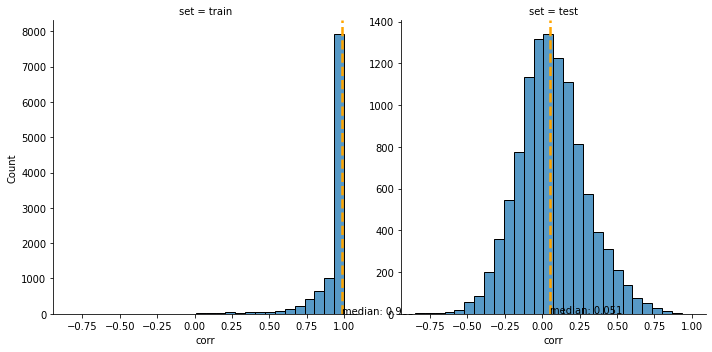

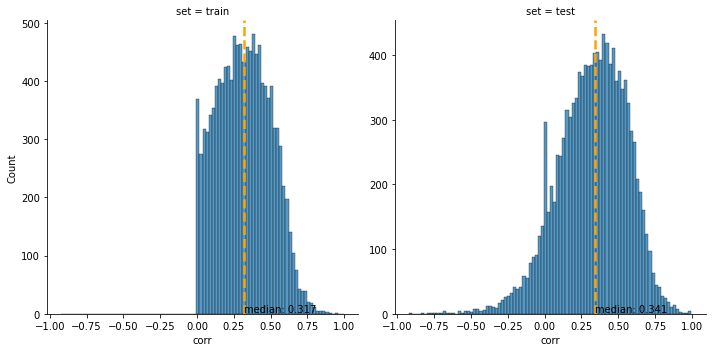

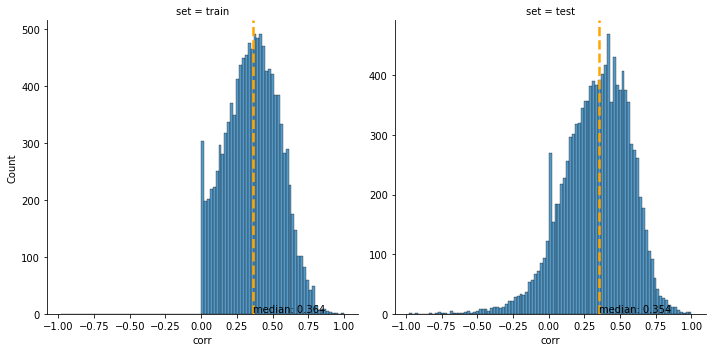

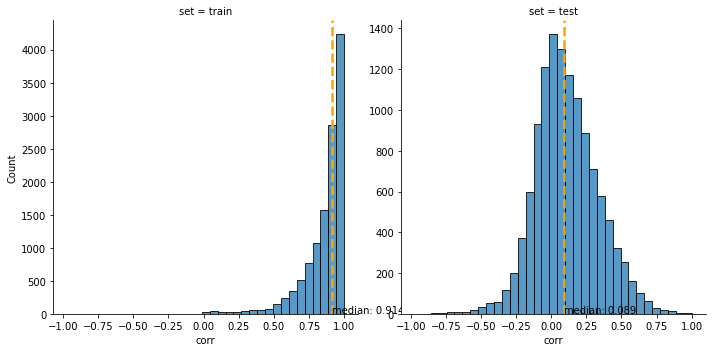

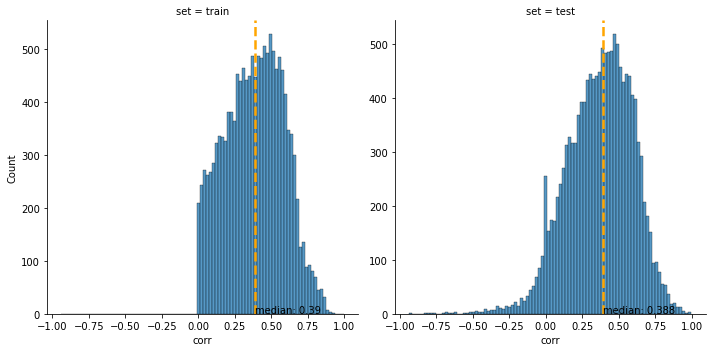

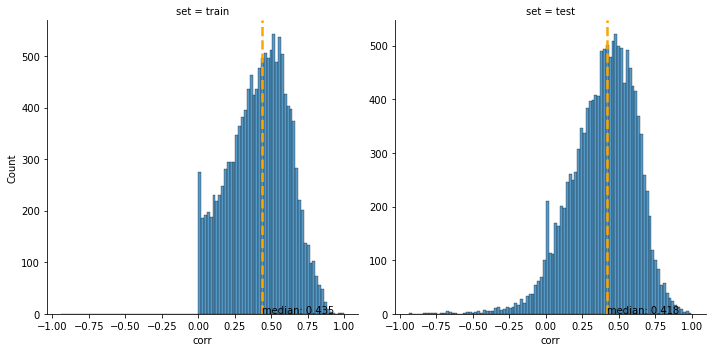

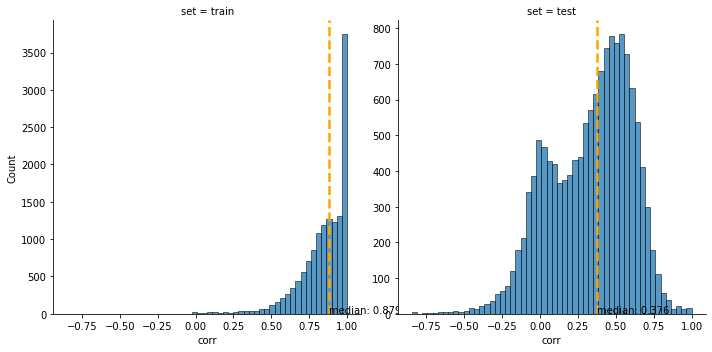

In [78]:
plot_corr('../out/tumor2_linreg_single.p')
plot_corr('../out/tumor2_linreg_corum.p')
plot_corr('../out/tumor2_linreg_string.p')

plot_corr('../out/tumor4_linreg_single.p')
plot_corr('../out/tumor4_linreg_corum.p')
plot_corr('../out/tumor4_linreg_string.p')

plot_corr('../out/tumor8_linreg_single.p')
plot_corr('../out/tumor8_linreg_corum.p')
plot_corr('../out/tumor8_linreg_string.p')

mean      0.382427
median    0.389774
Name: train, dtype: float64
mean      0.370127
median    0.388444
Name: test, dtype: float64


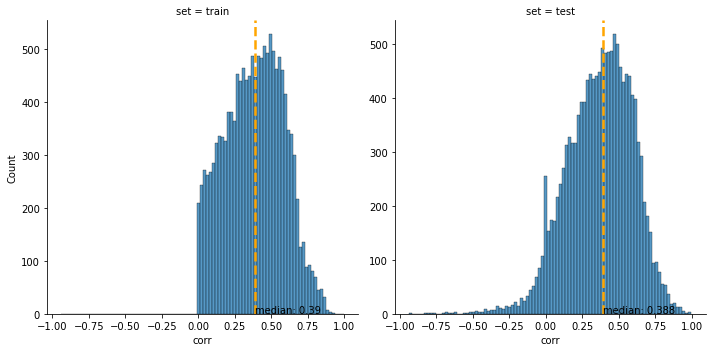